# Plot Uncertain Rosenbrock Local Reliability Study

After an epistemic uncertainty has been applied to constraint 1, a reliability analysis is plotted.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Read in output file
output_filename = Path("responses_stdout.txt")
with open(output_filename, "r") as output_file:
    for line_no, line_str in enumerate(output_file.readlines()):
        if "Cumulative Distribution Function (CDF)" in line_str:
            start = line_no + 3
        elif "Iterator local_reliability completed" in line_str:
            finish = line_no - 2
    
cdf_data = np.loadtxt(output_filename, skiprows=start, max_rows=(finish-start))
cdf_data

array([[-0.4       ,  0.04163226,  1.73205081,  1.73205081],
       [-0.3       ,  0.09696543,  1.29903811,  1.29903811],
       [-0.2       ,  0.19323812,  0.8660254 ,  0.8660254 ],
       [-0.1       ,  0.33250277,  0.4330127 ,  0.4330127 ],
       [ 0.        ,  0.5       ,  0.        ,  0.        ],
       [ 0.1       ,  0.66749723, -0.4330127 , -0.4330127 ],
       [ 0.2       ,  0.80676188, -0.8660254 , -0.8660254 ],
       [ 0.3       ,  0.90303457, -1.29903811, -1.29903811],
       [ 0.4       ,  0.95836774, -1.73205081, -1.73205081]])

Text(0.5, 1.0, 'Local reliability')

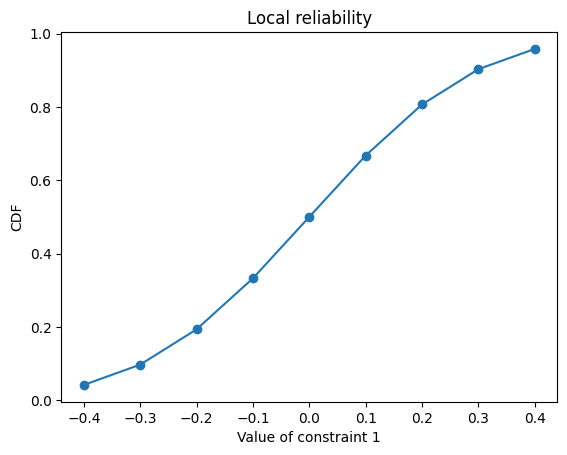

In [3]:
fig, ax = plt.subplots()
ax.plot(cdf_data[:,0], cdf_data[:,1], marker="o")
ax.set_xlabel("Value of constraint 1")
ax.set_ylabel("CDF")
ax.set_title("Local reliability")

As the uncertainty is linear, the CDF is expected to be linear too. However, the mean value approximation assumes normal (as opposed to uniform) distributions in uncertain variables, which may account for this curve.